## A) Data Manipulation:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split # To split the data
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
import seaborn as sn # For Visualization 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
dataFrame = pd.read_csv("Customer_Churn.csv")

In [3]:
# a. Extract the 5th column & store it in ‘customer_5’

customer_5 = dataFrame.iloc[:, 4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [4]:
# b. Extract the 15th column & store it in ‘customer_15’
customer_15 = dataFrame.iloc[:, 14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [5]:
# c. Extract all the male senior citizens whose Payment Method is Electronic check &
# store the result in ‘senior_male_electronic’
senior_male_electronic = dataFrame[(dataFrame["gender"] == "Male") & (dataFrame["SeniorCitizen"] == 1)
                                   & (dataFrame["PaymentMethod"] == "Electronic check")]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [6]:
#d. Extract all those customers whose tenure is greater than 70 months or their
# Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’

customer_total_tenure = dataFrame[(dataFrame["tenure"] > 70) | (dataFrame["MonthlyCharges"] > 100)]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [7]:
# e. Extract all the customers whose Contract is of two years, payment method is Mailed
# check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’

two_mail_yes = dataFrame[(dataFrame["Contract"] == "Two year") & (dataFrame["PaymentMethod"] == "Mailed check")
                                   & (dataFrame["Churn"] == "Yes")]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [8]:
# f. Extract 333 random records from the customer_churndataframe& store the result in
# ‘customer_333’
customer_333 = dataFrame.sample(333)
customer_333


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3872,2018-PZKMU,Male,0,Yes,Yes,9,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,103.10,970.45,No
2940,6313-GIDIT,Male,1,No,No,53,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,2854.55,Yes
6338,2081-KJSQF,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.25,20.25,No
5605,8049-WJCLQ,Male,0,Yes,Yes,10,Yes,No,DSL,No,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,60.20,563.5,No
6941,2405-LBMUW,Female,0,Yes,Yes,61,No,No phone service,DSL,Yes,...,No,Yes,No,Yes,One year,Yes,Bank transfer (automatic),50.70,3088.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,4927-WWOOZ,Male,0,Yes,No,2,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,91.45,171.45,No
2811,5804-JMYIO,Female,0,Yes,Yes,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.75,757.95,No
3661,1142-IHLOO,Female,0,No,No,51,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Credit card (automatic),87.55,4475.9,No
4013,9667-TKTVZ,Female,0,No,No,2,Yes,Yes,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,54.35,117.05,No


In [9]:
# g. Get the count of different levels from the ‘Churn’ column
dataFrame["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## B) Data Visualization:

Text(0.5, 1.0, 'Distribution of Internet Service')

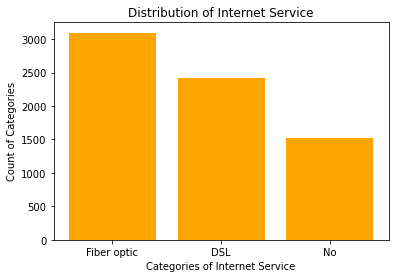

In [10]:
# a. Build a bar-plot for the ’InternetService’ column:
# i. Set x-axis label to ‘Categories of Internet Service’
# ii. Set y-axis label to ‘Count of Categories’
# iii. Set the title of plot to be ‘Distribution of Internet Service’
# iv. Set the color of the bars to be ‘orange’
keys = dataFrame["InternetService"].value_counts().keys().tolist()
values = dataFrame["InternetService"].value_counts().tolist()
plt.bar(keys, values, color="orange")
plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")

Text(0.5, 1.0, 'Distribution of tenure')

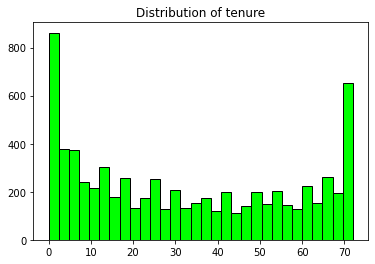

In [11]:
# b. Build a histogram for the ‘tenure’ column:
# i. Set the number of bins to be 30
# ii. Set the color of the bins to be ‘green’
# iii. Assign the title ‘Distribution of tenure’

# creating the histogram
plt.hist(dataFrame["tenure"], bins = 30, edgecolor='#000000', color ='#00FF00')
plt.title("Distribution of tenure")


Text(0, 0.5, 'Monthly Charges of customer')

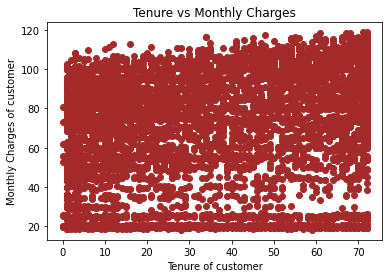

In [12]:
# c. Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to
# the y-axis & ‘tenure’ to the ‘x-axis’:
# i. Assign the points a color of ‘brown’
# ii. Set the x-axis label to ‘Tenure of customer’
# iii. Set the y-axis label to ‘Monthly Charges of customer’
# iv. Set the title to ‘Tenure vs Monthly Charges’

x = dataFrame["tenure"]
y = dataFrame["MonthlyCharges"]

#Creating the scatter Plot
plt.scatter(x,y, c="brown")
plt.title("Tenure vs Monthly Charges")
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")


<AxesSubplot:title={'center':'tenure'}, xlabel='[Contract]'>

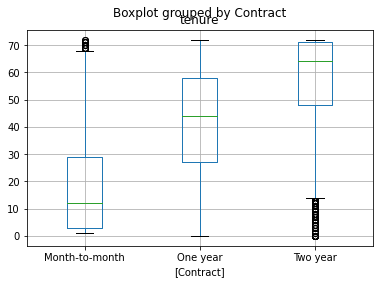

In [13]:
#d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
# ‘Contract’ on the x-axis.

#Box-plot using pandas df
dataFrame.boxplot(column='tenure',by=['Contract'])

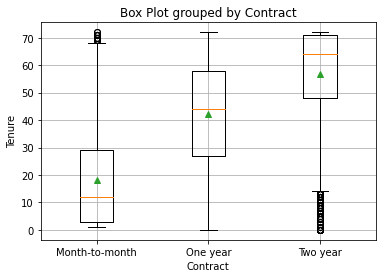

In [14]:
#d. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
# ‘Contract’ on the x-axis.

#  Box Plot using Matlab
Month_to_month = dataFrame[(dataFrame["Contract"] == "Month-to-month")].tenure
One_year = dataFrame[(dataFrame["Contract"] == "One year")].tenure
Two_year = dataFrame[(dataFrame["Contract"] == "Two year")].tenure

data = list([Month_to_month, One_year, Two_year])
#Plotting the data
plt.boxplot(data, showmeans = True)
plt.xticks([1, 2, 3], ["Month-to-month", "One year", "Two year"])
plt.title("Box Plot grouped by Contract")
plt.xlabel("Contract")
plt.ylabel("Tenure")
plt.grid(True)


## C) Linear Regression:

In [15]:
# a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’
X = dataFrame[["tenure"]]
y = dataFrame[["MonthlyCharges"]]
# i. Divide the dataset into train and test sets in 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4930, 1)
(2113, 1)
(4930, 1)
(2113, 1)


In [16]:
# ii. Build the model on train set and predict the values on test set

regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted Y'])
y_pred

,Predicted Y
0,67.515328
1,75.267438
2,58.522880
3,56.352289
4,57.902711
...,...
2108,57.902711
2109,58.212796
2110,61.313640
2111,76.507775


In [18]:
# iii. After predicting the values, find the root mean square error
# iv. Find out the error in prediction & store the result in ‘error’
# v. Find the root mean square error
# Root Mean Square Error
rse = metrics.mean_squared_error(y_test, y_pred)
print("Mean Square Error:" ,rse)
rmse = np.sqrt(rse)
print('Root Mean Squared Error:', rmse)

Mean Square Error: 850.043757180835
Root Mean Squared Error: 29.15550989402921


## D) Logistic Regression:

In [19]:
# a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ &
# independent variable is ‘MonthlyCharges’
# i. Divide the dataset in 65:35 ratio


X = dataFrame[["MonthlyCharges"]]
y = dataFrame[["Churn"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4577, 1)
(2466, 1)
(4577, 1)
(2466, 1)


In [20]:
# ii. Build the model on train set and predict the values on test set
regression = LogisticRegression()
regression.fit(X_train, y_train.values.ravel())

y_pred = regression.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [21]:
# iii. Build the confusion matrix and get the accuracy score

conf_matrix = confusion_matrix(y_pred,y_test)
accur_score = accuracy_score(y_pred,y_test)
print(conf_matrix)
print(accur_score)

[[1840  626]
 [   0    0]]
0.7461476074614761


In [22]:
# b. Build a multiple logistic regression model where dependent variable is ‘Churn’ &
# independent variables are ‘tenure’ & ‘MonthlyCharges’
# i. Divide the dataset in 80:20 ratio




X = dataFrame[["tenure","MonthlyCharges"]]
y = dataFrame[["Churn"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 2)
(1409, 2)
(5634, 1)
(1409, 1)


In [23]:
# ii. Build the model on train set and predict the values on test set

regression = LogisticRegression()
regression.fit(X_train, y_train.values.ravel())

y_pred = regression.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [24]:
# iii. Build the confusion matrix and get the accuracy score

conf_matrix = confusion_matrix(y_pred,y_test)
accur_score = accuracy_score(y_pred,y_test)
class_report = classification_report(y_test, y_pred, zero_division=1)
print(conf_matrix)
print(accur_score)
print(class_report) 

[[965 190]
 [ 96 158]]
0.7970191625266146
              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1061
         Yes       0.62      0.45      0.52       348

    accuracy                           0.80      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.80      0.79      1409



## E) Decision Tree:

In [25]:

# a. Build a decision tree model where dependent variable is ‘Churn’ & independent
# variable is ‘tenure’
# i. Divide the dataset in 80:20 ratio



X = dataFrame[["tenure"]]
y = dataFrame[["Churn"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) 

In [26]:
# ii. Build the model on train set and predict the values on test set
classifier = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 100, random_state = 0)

classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=100,
                       random_state=0)

In [27]:
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [28]:
# iii. Build the confusion matrix and calculate the accuracy
print(confusion_matrix(y_test, y_pred))   
print(accuracy_score(y_test, y_pred))

[[980  81]
 [254  94]]
0.7622427253371186


## F) Random Forest:

In [29]:
# a. Build a Random Forest model where dependent variable is ‘Churn’ & independent
# variables are ‘tenure’ and ‘MonthlyCharges’
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy

X = dataFrame[["tenure", "MonthlyCharges"]]
y = dataFrame[["Churn"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 



In [30]:
rf_classifier = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 100, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train.values.ravel())

RandomForestClassifier(criterion='entropy', min_samples_leaf=100,
                       random_state=0)

In [31]:
y_pred = rf_classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [33]:
print(confusion_matrix(y_test, y_pred))   
print(accuracy_score(y_test, y_pred))

[[1446  139]
 [ 275  253]]
0.804070042593469
